In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train_loan_appr.csv")
test = pd.read_csv("test_loan_appr.csv")

train_original = train.copy()

test_original = test.copy()



In [2]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [4]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape


(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [9]:
import matplotlib.pyplot as plt


In [10]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

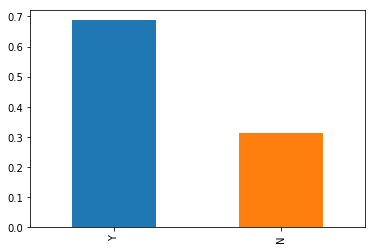

In [11]:
plt.show()

In [12]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

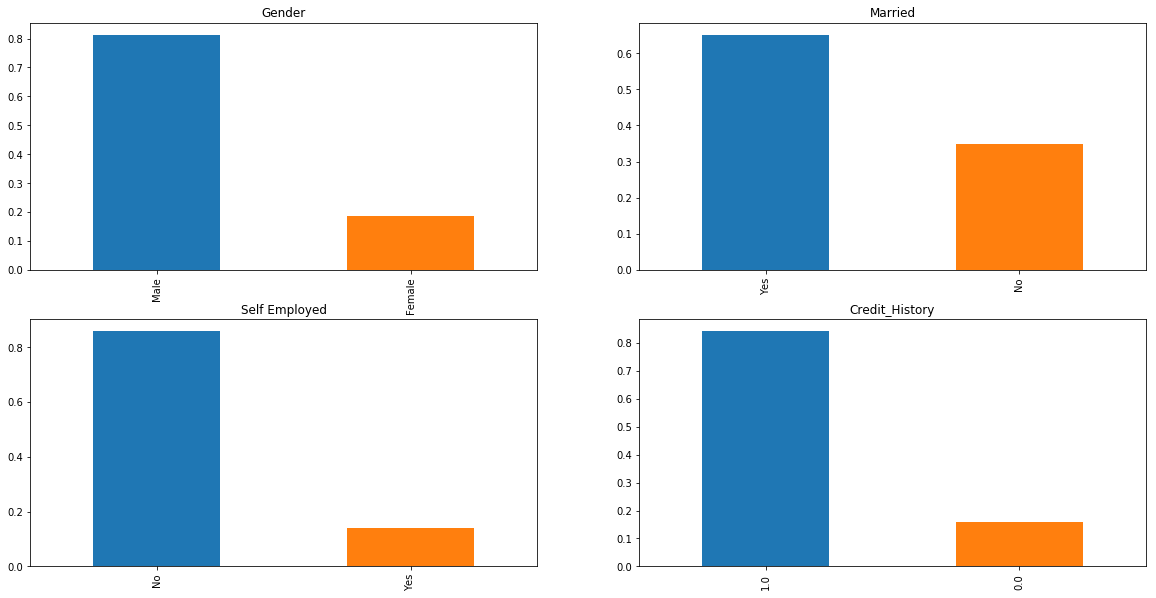

In [13]:
plt.figure(1)
plt.subplot(221)

train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

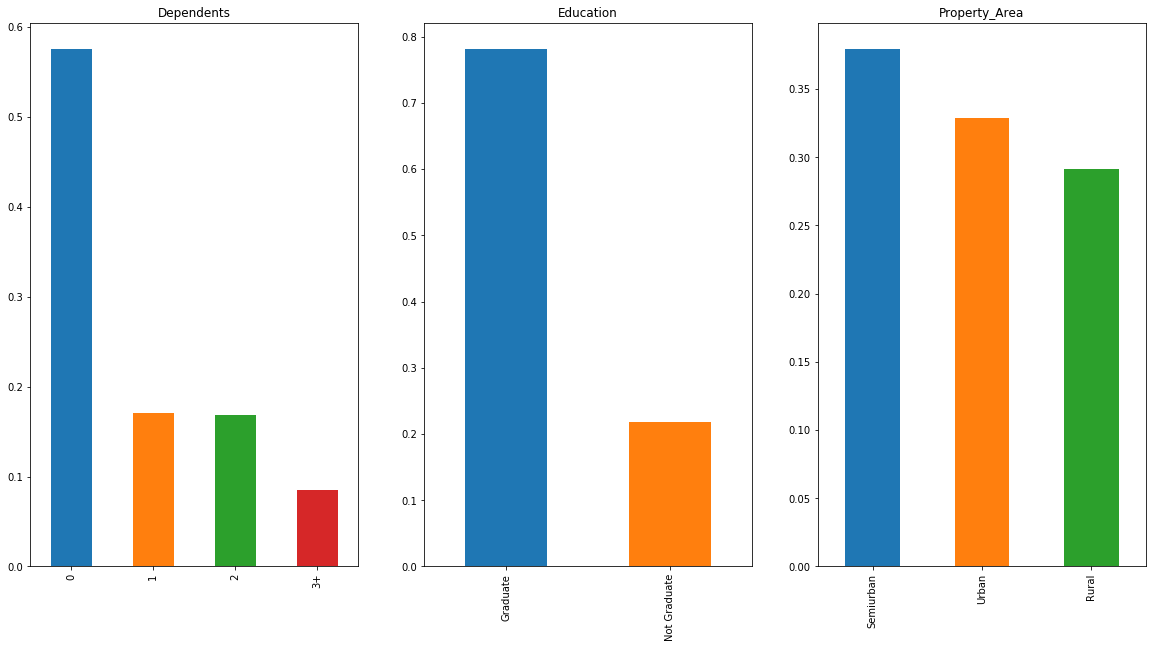

In [14]:
plt.figure(1)
plt.subplot(131)

train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')


plt.show()

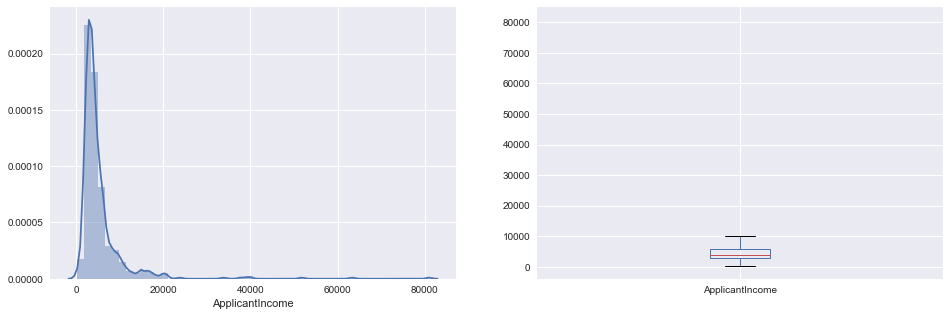

In [15]:
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()



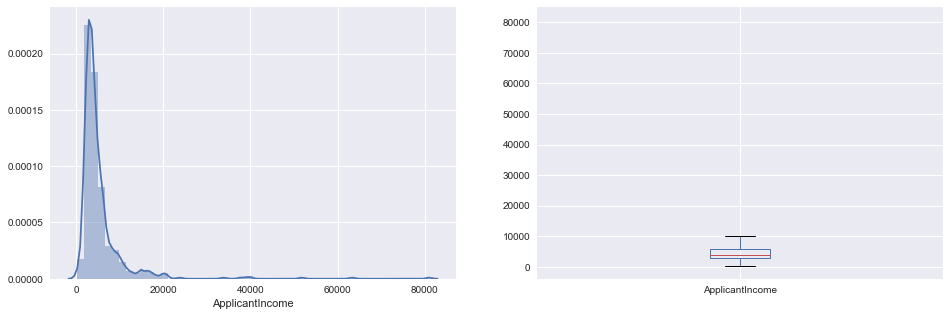

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

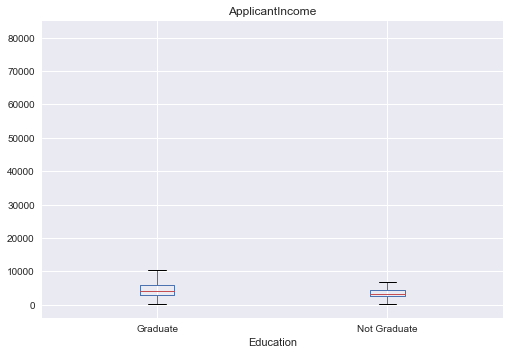

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

plt.show()

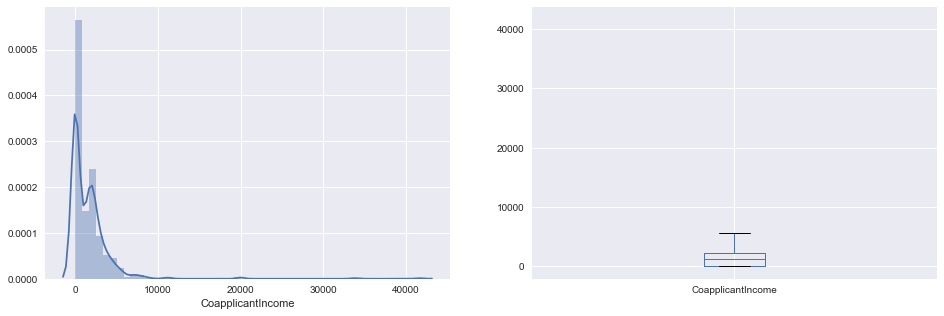

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show(
)

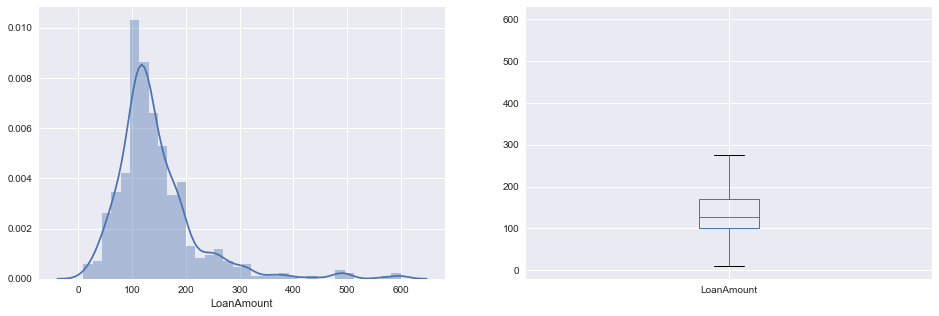

In [19]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()

sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [20]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis= 0)


Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [21]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [22]:
Gender.div(Gender.sum(1).astype(float),axis= 0).plot(kind='bar')


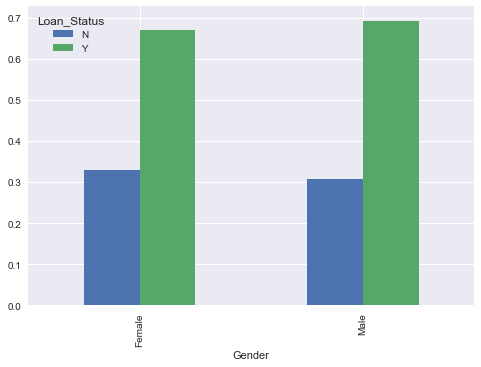

In [23]:
plt.show()

In [24]:
Gender.div(Gender.sum(1).astype(float),axis= 0).plot(kind='bar',stacked='True')

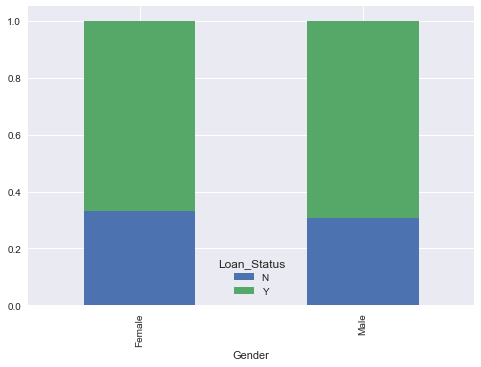

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
plt.show()
train.columns

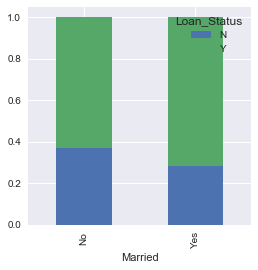

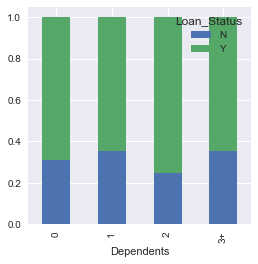

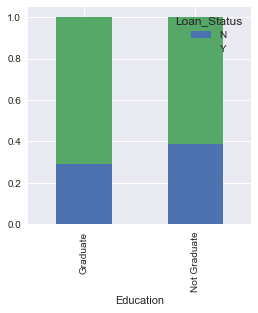

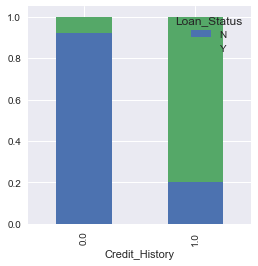

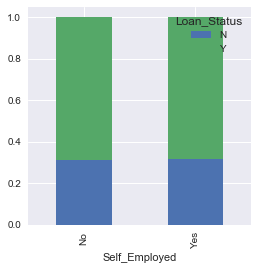

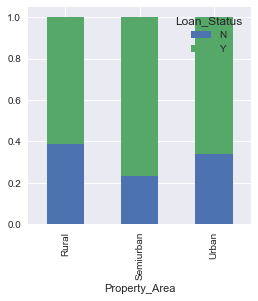

In [26]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

plt.figure(1)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))


Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))


Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()

In [27]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
                            

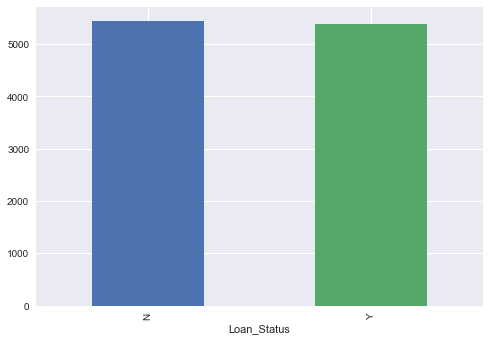

In [28]:
plt.show()

In [29]:
bins = [0,2000,4000,6000,80000]
groups = ['low','average','high','very high']
train['income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)

In [30]:
income_bin = pd.crosstab(train['income_bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

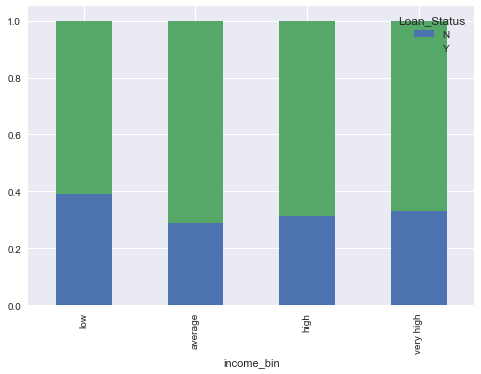

In [31]:
plt.show()

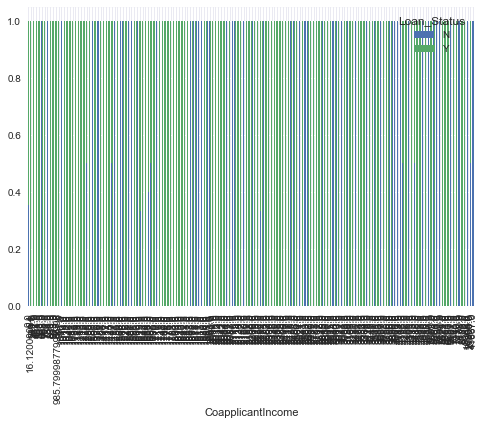

In [32]:
CoapplicantIncome = pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')
plt.show()

In [33]:
bins = [0,1000,3000,40000]
group=['low','average','high']
train['coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

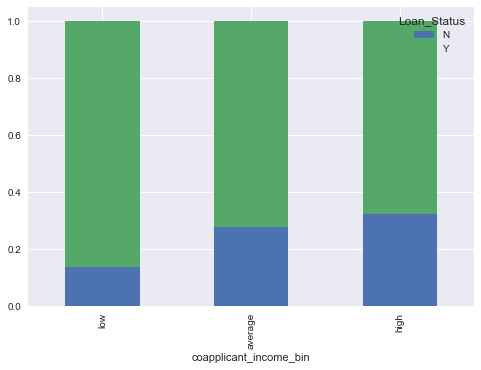

In [34]:
CoapplicantIncome = pd.crosstab(train['coapplicant_income_bin'],train['Loan_Status'])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')
plt.show()

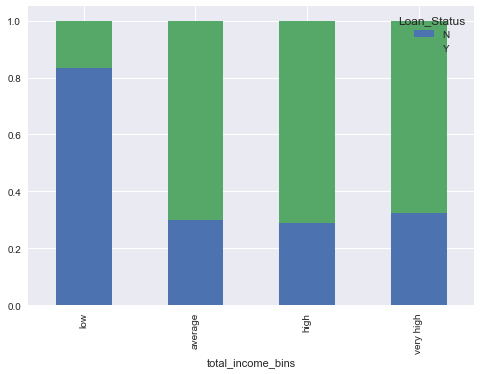

In [35]:
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins= [0,2000,4000,6000,80000]
group= ['low','average','high','very high']
train['total_income_bins'] = pd.cut(train['Total_income'],bins,labels=group)


TotalIncome = pd.crosstab(train['total_income_bins'],train['Loan_Status'])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

plt.show()

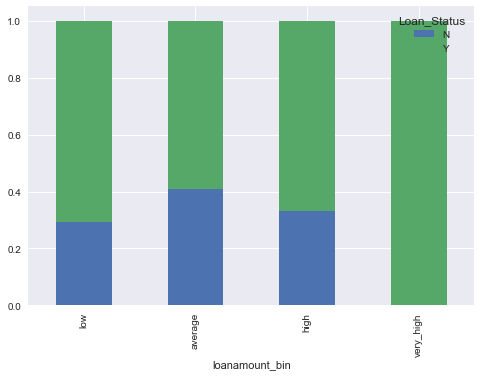

In [36]:
bins = [0,200,400,600,800]
group = ['low','average','high','very_high']
train['loanamount_bin']= pd.cut(train['LoanAmount'],bins,labels=group)


loan_amount_bin = pd.crosstab(train['loanamount_bin'],train['Loan_Status'])
loan_amount_bin.div(loan_amount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')
plt.show()

In [37]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'income_bin', 'coapplicant_income_bin', 'Total_income',
       'total_income_bins', 'loanamount_bin'],
      dtype='object')

In [38]:
train = train.drop(['income_bin','coapplicant_income_bin','total_income_bins', 'loanamount_bin'],axis=1)

In [39]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income'],
      dtype='object')

In [40]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [41]:
matrix = train.corr()
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')

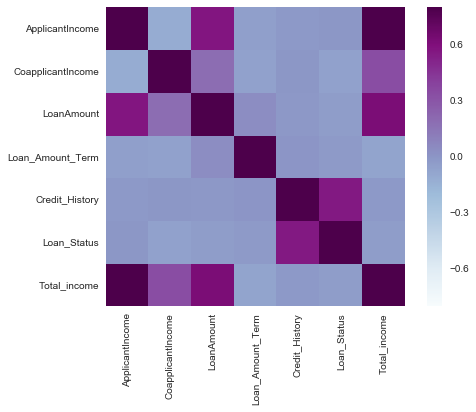

In [42]:
plt.show()

In [43]:
# Missing Values

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64

In [44]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [45]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [47]:
train.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [48]:
train.LoanAmount.fillna(train.LoanAmount.mode()[0],inplace=True)

In [49]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

In [50]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [51]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [52]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

In [54]:
test.LoanAmount.value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
120.0     9
187.0     9
130.0     8
108.0     8
135.0     7
80.0      6
104.0     5
122.0     5
185.0     5
176.0     5
160.0     5
131.0     5
200.0     5
65.0      4
123.0     4
180.0     4
152.0     4
102.0     4
70.0      4
138.0     4
116.0     4
143.0     4
105.0     4
126.0     4
140.0     4
         ..
173.0     1
157.0     1
159.0     1
213.0     1
61.0      1
550.0     1
71.0      1
225.0     1
209.0     1
214.0     1
103.0     1
412.0     1
256.0     1
234.0     1
74.0      1
30.0      1
72.0      1
151.0     1
189.0     1
142.0     1
66.0      1
232.0     1
390.0     1
55.0      1
155.0     1
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

In [55]:
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

In [56]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
df = train


In [58]:
df.dropna()
sns.distplot(df.LoanAmount)

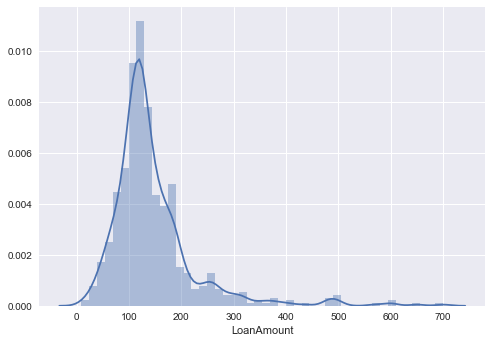

In [59]:
plt.show()

In [60]:
train.LoanAmount = np.log(train.LoanAmount)
train.LoanAmount.hist(bins=20)

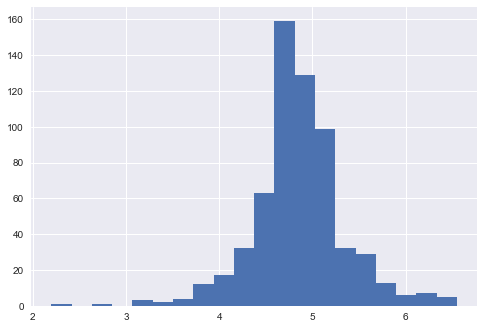

In [61]:
plt.show()

In [62]:
test.LoanAmount = np.log(test.LoanAmount)

In [63]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income'],
      dtype='object')

In [64]:
train = train.drop('Total_income',1)


In [65]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
train=train.drop('Loan_ID',axis=1)

In [67]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [69]:
test=test.drop('Loan_ID',axis=1)

In [70]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [71]:
X = train.drop('Loan_Status',axis=1)


In [72]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [73]:
y = train.Loan_Status

In [74]:
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [75]:
X = pd.get_dummies(X)

In [76]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [77]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
train = pd.get_dummies(train)


In [79]:
test = pd.get_dummies(test)

In [80]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [81]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split

X_train,x_cv, y_train, y_cv = train_test_split(X,y, test_size= 0.3)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train,y_train)

pred_cv = model.predict(x_cv)

pred_cv

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [84]:
accuracy_score(y_cv,pred_cv)

0.78918918918918923

In [85]:
pred_test = model.predict(test)

In [86]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [87]:
submission = pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [88]:
submission.Loan_Status = pred_test

In [89]:
submission.Loan_ID = test_original.Loan_ID

In [90]:
submission.Loan_Status.replace(0,'N',inplace=True)

In [91]:
submission.Loan_Status.replace(1,'Y',inplace=True)

In [92]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [93]:
from sklearn.model_selection import StratifiedKFold

In [94]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [95]:
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.798387096774

2 of kfold 5
accuracy_score 0.83064516129

3 of kfold 5
accuracy_score 0.811475409836

4 of kfold 5
accuracy_score 0.795081967213

5 of kfold 5
accuracy_score 0.827868852459


In [96]:
pred_test = model.predict(test)

In [97]:
pred=model.predict_proba(xvl)[:,1]

In [98]:
from sklearn import metrics

fpr,tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred)

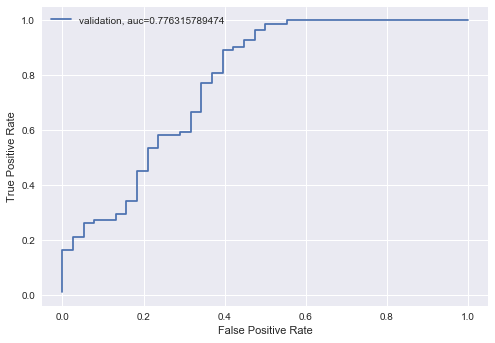

In [99]:
plt.figure(1)
plt.plot(fpr,tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [100]:
submission.Loan_Status = pred_test

In [101]:
submission.Loan_ID = test_original.Loan_ID

In [102]:
submission.Loan_Status.replace(0,'N',inplace=True)

In [103]:
submission.Loan_Status.replace(1,'Y',inplace=True)

In [104]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic_csv')

In [105]:
pred

array([ 0.78531689,  0.7029445 ,  0.29614333,  0.83953129,  0.30873125,
        0.18001684,  0.87136957,  0.6236031 ,  0.81356302,  0.88967488,
        0.7917186 ,  0.1054365 ,  0.74519805,  0.13937212,  0.86432941,
        0.86119305,  0.64806932,  0.79049178,  0.83046327,  0.79090331,
        0.78092179,  0.20831569,  0.80848764,  0.70404577,  0.74605853,
        0.92294238,  0.69671091,  0.67919023,  0.76202304,  0.34157324,
        0.867183  ,  0.71987899,  0.18671714,  0.67774827,  0.92933112,
        0.85194524,  0.81220332,  0.84429473,  0.69346775,  0.80639521,
        0.88699848,  0.84684864,  0.64537445,  0.77121026,  0.83084609,
        0.76457738,  0.4772727 ,  0.62164889,  0.85719825,  0.59449687,
        0.84508247,  0.26527677,  0.83145197,  0.65144923,  0.68169609,
        0.7711574 ,  0.84335087,  0.63507015,  0.65000147,  0.69604548,
        0.91634181,  0.08423399,  0.71485414,  0.85190067,  0.8453346 ,
        0.88429775,  0.86461689,  0.88879251,  0.64135857,  0.68

In [106]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [107]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [108]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.787492,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,4.189655,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,4.787492,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,4.948760,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,5.587249,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1
6,2333,1516.0,4.553877,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
7,3036,2504.0,5.062595,360.0,0.0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
8,4006,1526.0,5.123964,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
9,12841,10968.0,5.855072,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0


In [109]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [110]:
train['Total_income'] = train.ApplicantIncome + train.CoapplicantIncome

In [111]:
test['Total_income'] = test.ApplicantIncome + train.CoapplicantIncome

In [112]:
test['Total_income'].isnull().any()

False

In [113]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,4.827019,342.822888,0.839237,0.190736,0.809264,0.365123,0.634877,0.108992,...,0.158038,0.160763,0.771117,0.228883,0.899183,0.100817,0.302452,0.316076,0.381471,6318.271935
std,4910.685399,2334.232099,0.416189,64.658402,0.367814,0.393417,0.393417,0.482122,0.482122,0.312054,...,0.365275,0.367814,0.420687,0.420687,0.301498,0.301498,0.459947,0.465578,0.486411,5160.368266
min,0.000000,0.000000,3.332205,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,4.615121,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3851.000000
50%,3786.000000,1025.000000,4.828314,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5222.000000
75%,5060.000000,2430.500000,5.059420,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7179.000000
max,72529.000000,24000.000000,6.309918,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72529.000000


In [114]:
test.Total_income.replace(0,123,inplace=True)

In [115]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,4.854938,342.410423,0.855049,0.687296,0.182410,0.817590,0.346906,0.653094,...,0.166124,0.164495,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,7024.705081
std,6109.041673,2926.248369,0.496165,64.428629,0.352339,0.463973,0.386497,0.386497,0.476373,0.476373,...,0.372495,0.371027,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,6458.663872
min,150.000000,0.000000,2.197225,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,4.607658,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,4.828314,360.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5416.500000
75%,5795.000000,2297.250000,5.104426,360.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,6.551080,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000


In [116]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income'],
      dtype='object')

In [117]:
sns.distplot(train['Total_income'])

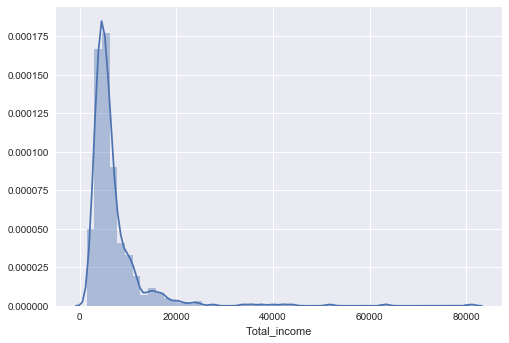

In [118]:
plt.show()

In [119]:
train['Total_Income_Log'] = np.log(train.Total_income)
test['Total_Income_Log'] = np.log(test.Total_income)

In [120]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_income', 'Total_Income_Log'],
      dtype='object')

In [121]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income,Total_Income_Log
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,4.827019,342.822888,0.839237,0.190736,0.809264,0.365123,0.634877,0.108992,...,0.160763,0.771117,0.228883,0.899183,0.100817,0.302452,0.316076,0.381471,6318.607084,8.579645
std,4910.685399,2334.232099,0.416189,64.658402,0.367814,0.393417,0.393417,0.482122,0.482122,0.312054,...,0.367814,0.420687,0.420687,0.301498,0.301498,0.459947,0.465578,0.486411,5159.960771,0.573972
min,0.000000,0.000000,3.332205,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,4.812184
25%,2864.000000,0.000000,4.615121,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3851.000000,8.256083
50%,3786.000000,1025.000000,4.828314,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5222.000000,8.560636
75%,5060.000000,2430.500000,5.059420,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7179.000000,8.878914
max,72529.000000,24000.000000,6.309918,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72529.000000,11.191742


In [122]:
sns.distplot(train.Total_Income_Log)

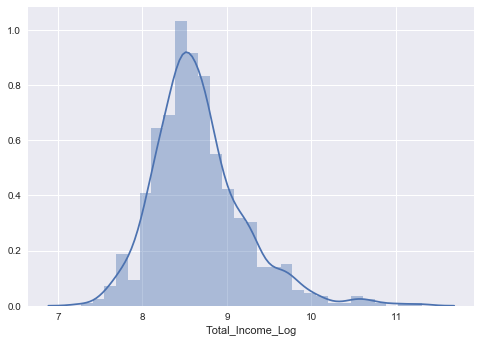

In [123]:
plt.show()

In [124]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

In [125]:
sns.distplot(train.EMI)

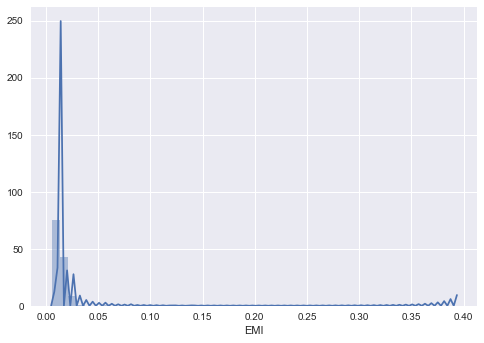

In [126]:
plt.show()

In [127]:
train['Balance Income'] = train['Total_income']-(train['EMI'] *1000)
test['Balance Income'] = test['Total_income']- (test['EMI']*1000)

In [128]:
sns.distplot(train['Balance Income'])

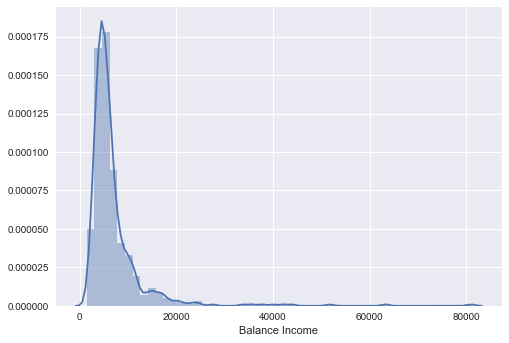

In [129]:
plt.show()

In [130]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [131]:
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [132]:
X = train.drop('Loan_Status',1)

In [133]:
y = train.Loan_Status

In [134]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [135]:
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    
    model.fit(xtr,ytr)
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy_score',score)
    i+=1
    



 1 of kfold 5
accuracy_score 0.798387096774

 2 of kfold 5
accuracy_score 0.83064516129

 3 of kfold 5
accuracy_score 0.803278688525

 4 of kfold 5
accuracy_score 0.762295081967

 5 of kfold 5
accuracy_score 0.827868852459


In [136]:
pred_test = model.predict(test)


In [137]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

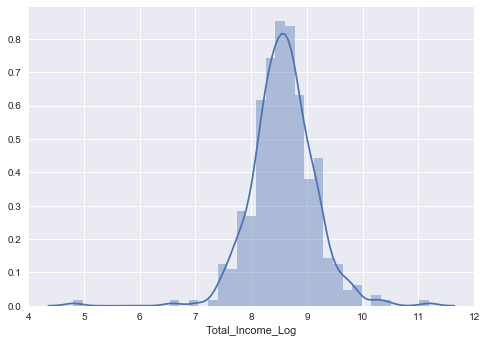

In [138]:
sns.distplot(test.Total_Income_Log)
plt.show()

In [139]:
pred = model.predict_proba(xcv)[:,1]

In [140]:
pred

array([ 0.77959328,  0.70052778,  0.27160338,  0.83412878,  0.28213559,
        0.15765214,  0.86706904,  0.6728446 ,  0.8166332 ,  0.89455117,
        0.78946772,  0.08377529,  0.78031233,  0.11861963,  0.88559927,
        0.88258351,  0.68595561,  0.73120784,  0.84876385,  0.78886093,
        0.79804721,  0.20248723,  0.8496524 ,  0.7056525 ,  0.67211455,
        0.92476884,  0.660418  ,  0.68267404,  0.79784445,  0.2214152 ,
        0.88374489,  0.74109476,  0.23192233,  0.66941663,  0.90659077,
        0.79874546,  0.77362953,  0.82363355,  0.69484978,  0.81650233,
        0.89973901,  0.85796324,  0.6620163 ,  0.78714843,  0.83792561,
        0.80989781,  0.38310227,  0.63708727,  0.79642015,  0.62044075,
        0.86131408,  0.27548784,  0.89377683,  0.66923988,  0.67595867,
        0.77274519,  0.84682801,  0.69232905,  0.65903621,  0.68029288,
        0.92193005,  0.08246699,  0.71210629,  0.83676115,  0.84873662,
        0.89940898,  0.88441102,  0.88804955,  0.63246149,  0.71

In [141]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [142]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [143]:
pd.DataFrame(submission,columns= ['Loan_Status','Loan_ID']).to_csv('Log2.csv')

In [144]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold '.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index],X.loc[test_index]
    ytr,ycv = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    
pred_test = model.predict(test)
    
    


 1 of kfold 
accuracy score 0.725806451613

 2 of kfold 
accuracy score 0.725806451613

 3 of kfold 
accuracy score 0.696721311475

 4 of kfold 
accuracy score 0.72131147541

 5 of kfold 
accuracy score 0.696721311475


In [145]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']



In [146]:
submission.Loan_Status.replace(0,'N',inplace=True)
submission.Loan_Status.replace(1,'Y',inplace=True)

In [147]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [148]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    
pred_test = model.predict(test)


 1 kfold of 5
accuracy score 0.766129032258

 2 kfold of 5
accuracy score 0.822580645161

 3 kfold of 5
accuracy score 0.754098360656

 4 kfold of 5
accuracy score 0.737704918033

 5 kfold of 5
accuracy score 0.803278688525


In [149]:
from sklearn.model_selection import GridSearchCV

paramgrid = { 'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
gridsearch = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

gridsearch.fit(X_train,y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [150]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [151]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=21)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    
pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


 1 kfold of 5
accuracy score 0.798387096774

 2 kfold of 5
accuracy score 0.83064516129

 3 kfold of 5
accuracy score 0.803278688525

 4 kfold of 5
accuracy score 0.795081967213

 5 kfold of 5
accuracy score 0.827868852459


In [152]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [153]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [154]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

In [155]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

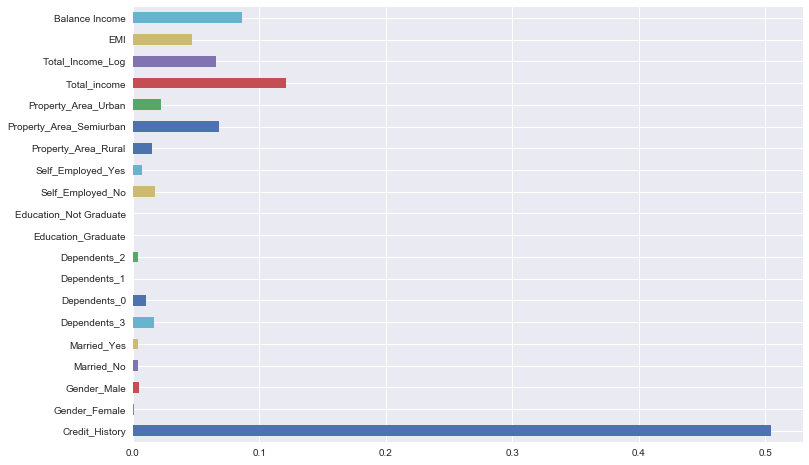

In [156]:
plt.show()

In [157]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


 1 kfold of 5
accuracy score 0.782258064516

 2 kfold of 5
accuracy score 0.822580645161

 3 kfold of 5
accuracy score 0.745901639344

 4 kfold of 5
accuracy score 0.786885245902

 5 kfold of 5
accuracy score 0.83606557377


In [158]:
!pip install xgboost

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [159]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [160]:
from sklearn.model_selection import GridSearchCV

paramgrid = { 'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
gridsearch = GridSearchCV(XGBClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

gridsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
gridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=161,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [162]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} kfold of {}'.format(i,kf.n_splits))
    xtr,xcv = X.loc[train_index], X.loc[test_index]
    ytr,ycv = y[train_index], y[test_index]
    
    model = XGBClassifier(max_depth=1,n_estimators=161)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xcv)
    score = accuracy_score(ycv,pred_test)
    print('accuracy score',score)
    i+=1
    
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


 1 kfold of 5
accuracy score 0.806451612903

 2 kfold of 5
accuracy score 0.83064516129

 3 kfold of 5
accuracy score 0.803278688525

 4 kfold of 5
accuracy score 0.795081967213

 5 kfold of 5
accuracy score 0.827868852459


In [163]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')